### Geospatial Analysis and Visualization of Hurricane Florence's Trajectory: Unveiling Patterns and Implications from August 30th to September 18th, 2018

#### Importing all necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point
import missingno as msn

%matplotlib inline


C:\Users\Renz\AppData\Local\Temp\ipykernel_14664\3363143759.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Data sources:

US States deospatial data, 5m, GeoJSON file: https://eric.clst.org/tech/usgeojson/

Hurricane Florence data, florence.csv: https://flhurricane.com/cyclone/stormhistory.php?storm=6&year=2018



In [2]:
country = geopandas.read_file("C:/Users/Renz/Documents/GitHub/Geospatial Analysis and Visualization of Hurricane Florence's Trajectory - Unveiling Patterns and Implications from August 30th to September 18th, 2018/gz_2010_us_040_00_5m.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [3]:
type(country)

geopandas.geodataframe.GeoDataFrame

In [4]:
country.geometry.head()

0    MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...
1    MULTIPOLYGON (((-166.10574 53.98861, -166.0752...
2    POLYGON ((-112.53859 37.00067, -112.53454 37.0...
3    POLYGON ((-94.04296 33.01922, -94.04304 33.079...
4    MULTIPOLYGON (((-122.42144 37.86997, -122.4213...
Name: geometry, dtype: geometry

In [5]:
type(country.geometry)

geopandas.geoseries.GeoSeries

In [6]:
type(country.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

<Axes: >

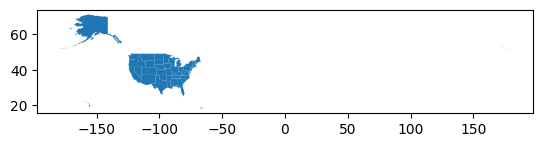

In [7]:
country.plot()

<Axes: >

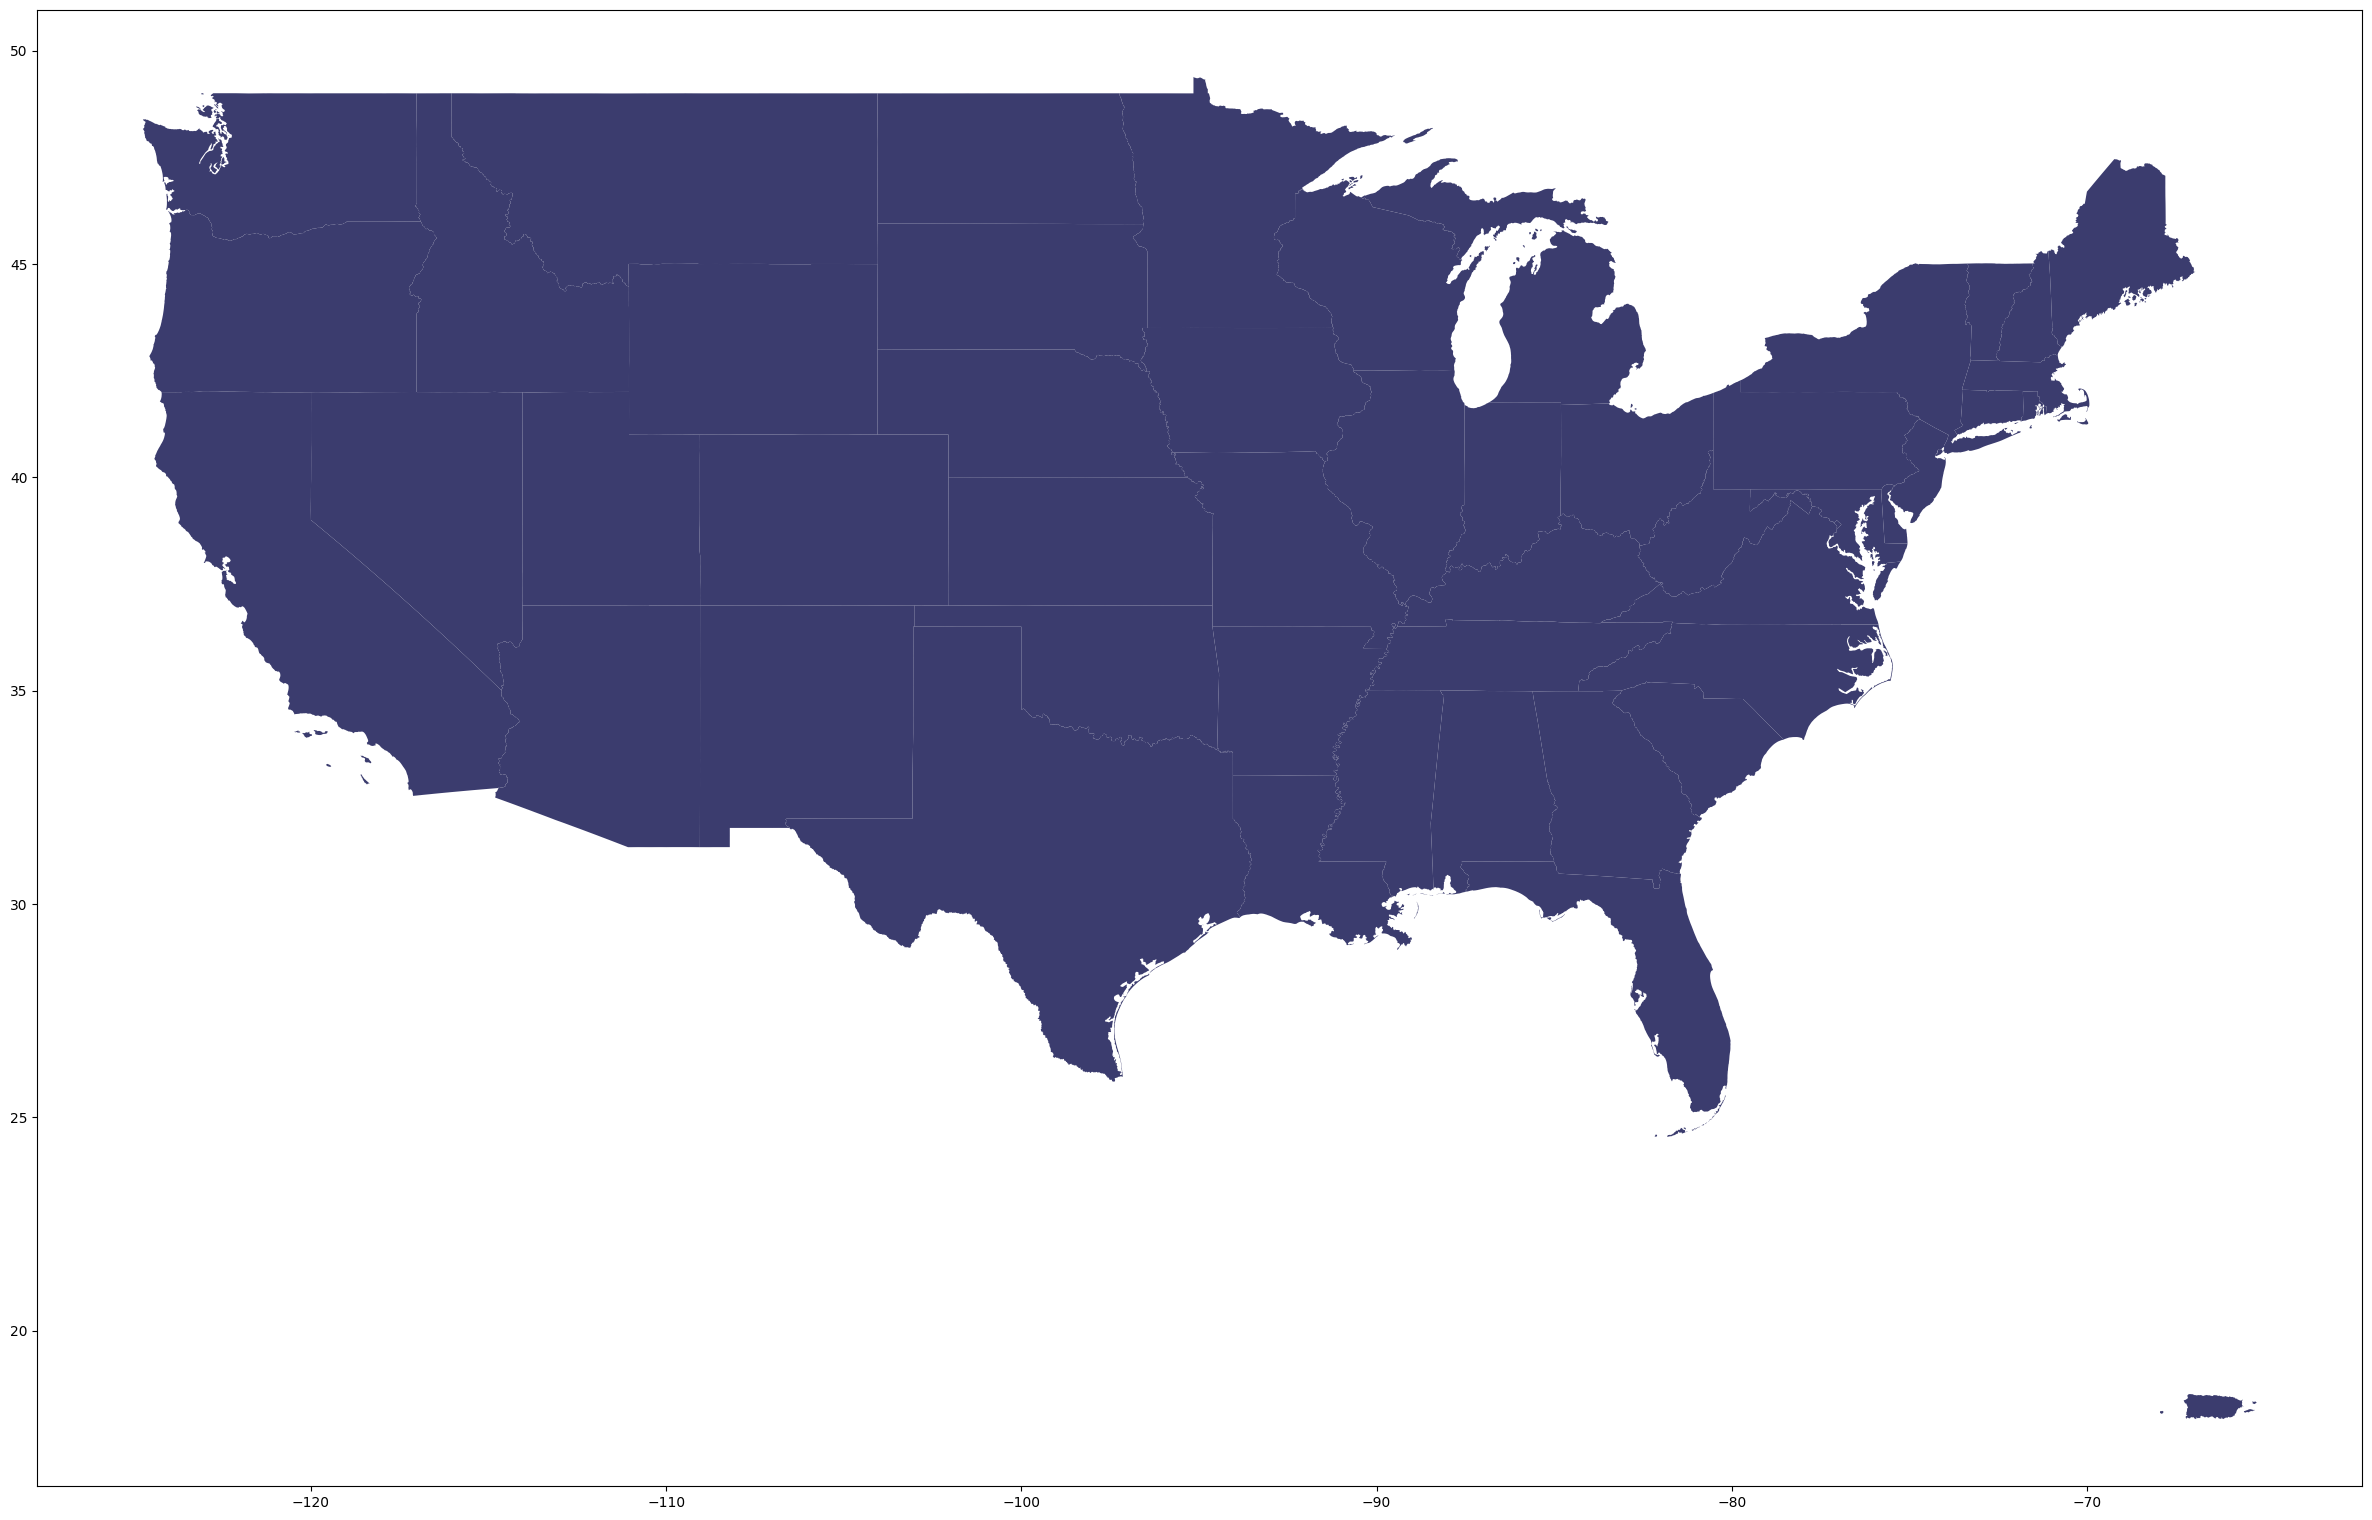

In [8]:
# Excluding Alaska and Hawaii
country[country['NAME'].isin(['Alaska', 'Hawaii'])== False].plot(figsize = (30, 20), color='#3B3C6E')

In [9]:
florence = pd.read_csv("C:/Users/Renz/Documents/GitHub/Geospatial Analysis and Visualization of Hurricane Florence's Trajectory - Unveiling Patterns and Implications from August 30th to September 18th, 2018/florence.csv")
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila
1,1A,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila
2,2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila
3,2A,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven
4,3,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven


#### Exploratory Data Analysis

Missing values in Florence dataset were checked and visualized using the missingno package. A much simpler approach is to use the .info() method. There is one missing value on the Forecaster column, but this column was not needed anyway and was eventually dropped along with AdvisoryNumber and Received columns.

In [10]:
florence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AdvisoryNumber  105 non-null    object 
 1   Date            105 non-null    object 
 2   Lat             105 non-null    float64
 3   Long            105 non-null    float64
 4   Wind            105 non-null    int64  
 5   Pres            105 non-null    int64  
 6   Movement        105 non-null    object 
 7   Type            105 non-null    object 
 8   Name            105 non-null    object 
 9   Received        105 non-null    object 
 10  Forecaster      104 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 9.2+ KB


<Axes: >

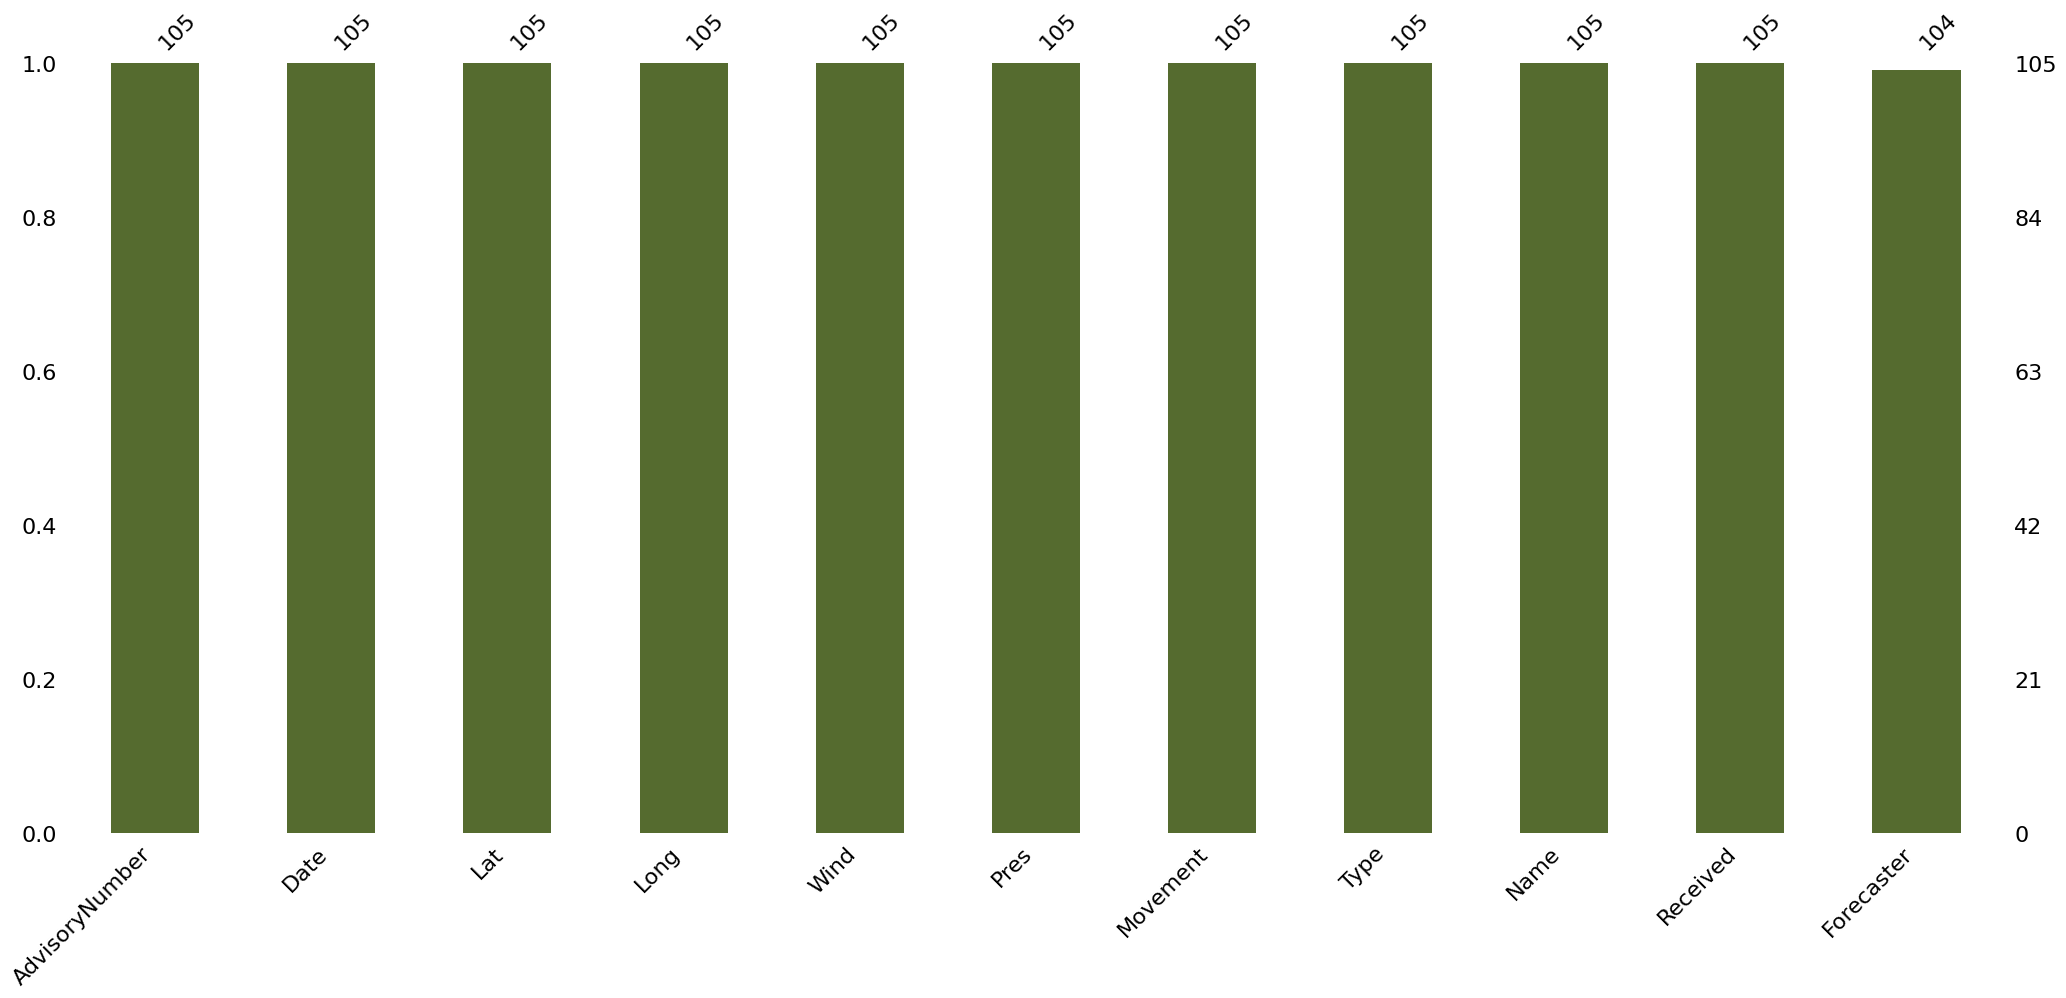

In [11]:
msn.bar(florence, color='darkolivegreen')

In [12]:
florence.describe()

,Lat,Long,Wind,Pres
count,105.000000,105.000000,105.000000,105.000000
mean,25.931429,56.938095,74.428571,981.571429
std,7.975917,20.878865,36.560765,22.780667
min,12.900000,18.400000,25.000000,939.000000
25%,18.900000,41.000000,40.000000,956.000000
50%,25.100000,60.000000,70.000000,989.000000
75%,33.600000,76.400000,105.000000,1002.000000
max,42.600000,82.900000,140.000000,1008.000000


Only working on date, latitude, longitude, wind speed, pressure, and name columns, the rest of unused columns were dropped.

In [13]:
florence = florence.drop(['AdvisoryNumber', 'Received', 'Forecaster'], axis=1)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


Here the longitude is west so a "-" was added in front of the number to correctly plot the data.

In [14]:
florence['Long'] = 0 - florence['Long']
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


Latitude and Longitude were combined to create hurricane Coordinates column. For visualization purposes, the Coordinates column was converted into GeoPoint.

In [15]:
florence['Coordinates'] = florence[['Long', 'Lat']].values.tolist()
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-18.4, 12.9]"
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.0, 12.9]"
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.4, 12.9]"
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.4, 13.1]"
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.9, 13.2]"


In [16]:
florence['Coordinates'] = florence['Coordinates'].apply(Point)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)


By checking, the data type of florence and its Coordinates column are pandas DataFrame and Series, respectively. These were converted into GeoDataFrame and GeoSeries, or into geospatial data, using the geopandas package. 

In [17]:
florence = geopandas.GeoDataFrame(florence, geometry='Coordinates')
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.40000 12.90000)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.00000 12.90000)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.40000 12.90000)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.40000 13.10000)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.90000 13.20000)


In [18]:
type(florence['Coordinates'])

geopandas.geoseries.GeoSeries

In [19]:
type(florence)

geopandas.geodataframe.GeoDataFrame

In [20]:
florence.groupby('Name').Type.count()

Name
FLORENCE     6
Florence    85
SIX          4
Six         10
Name: Type, dtype: int64

Finding the mean and maximum wind speed of hurricane Florence

In [21]:
print("Mean wind speed: {} kph".format(round(florence.Wind.mean()*1.60934, 3)))

Mean wind speed: 119.781 kph


In [22]:
print("Maximum wind speed: {} kph".format(round(florence.Wind.max()*1.60934, 3)))

Maximum wind speed: 225.308 kph


#### Visualization

C:\Users\Renz\AppData\Local\Temp\ipykernel_14664\3009375851.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Oranges")  # Choose a colormap (adjust as desired)


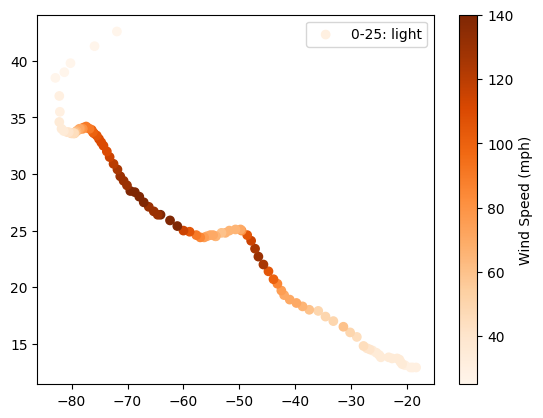

In [26]:
#florence.plot(figsize=(20, 10))

from matplotlib.cm import ScalarMappable
fig, ax = plt.subplots()
wind_speeds = florence['Wind']

#wind_ranges = [('<=25', 'light'), ('25-35', 'moderate'), ('35-60', 'strong'), 
 #                ('60-77', 'severe'), ('77-111', 'extreme'), ('111-140+', 'catastrophic')]

x = florence['Long']
y = florence['Lat']

wind_ranges = [(0, 25, "light"), (25, 35, "moderate"), (35, 60, "strong")]

cmap = plt.cm.get_cmap("Oranges")  # Choose a colormap (adjust as desired)
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(min(wind_speeds), max(wind_speeds)))
sm.set_array([])  # Set an empty array

# Scatter plot with color based on wind speed
plt.scatter(x, y, c=wind_speeds, cmap=cmap)  # Replace x and y with your actual data

# Create a legend for the colorbar
plt.colorbar(sm, label="Wind Speed (mph)", ax=ax)

# Optional: Add labels for wind speed ranges in the legend (manually)
legend_labels = [f"{r[0]}-{r[1]}: {r[2]}" for r in wind_ranges]
plt.legend(loc="best", labels=legend_labels)
plt.show()

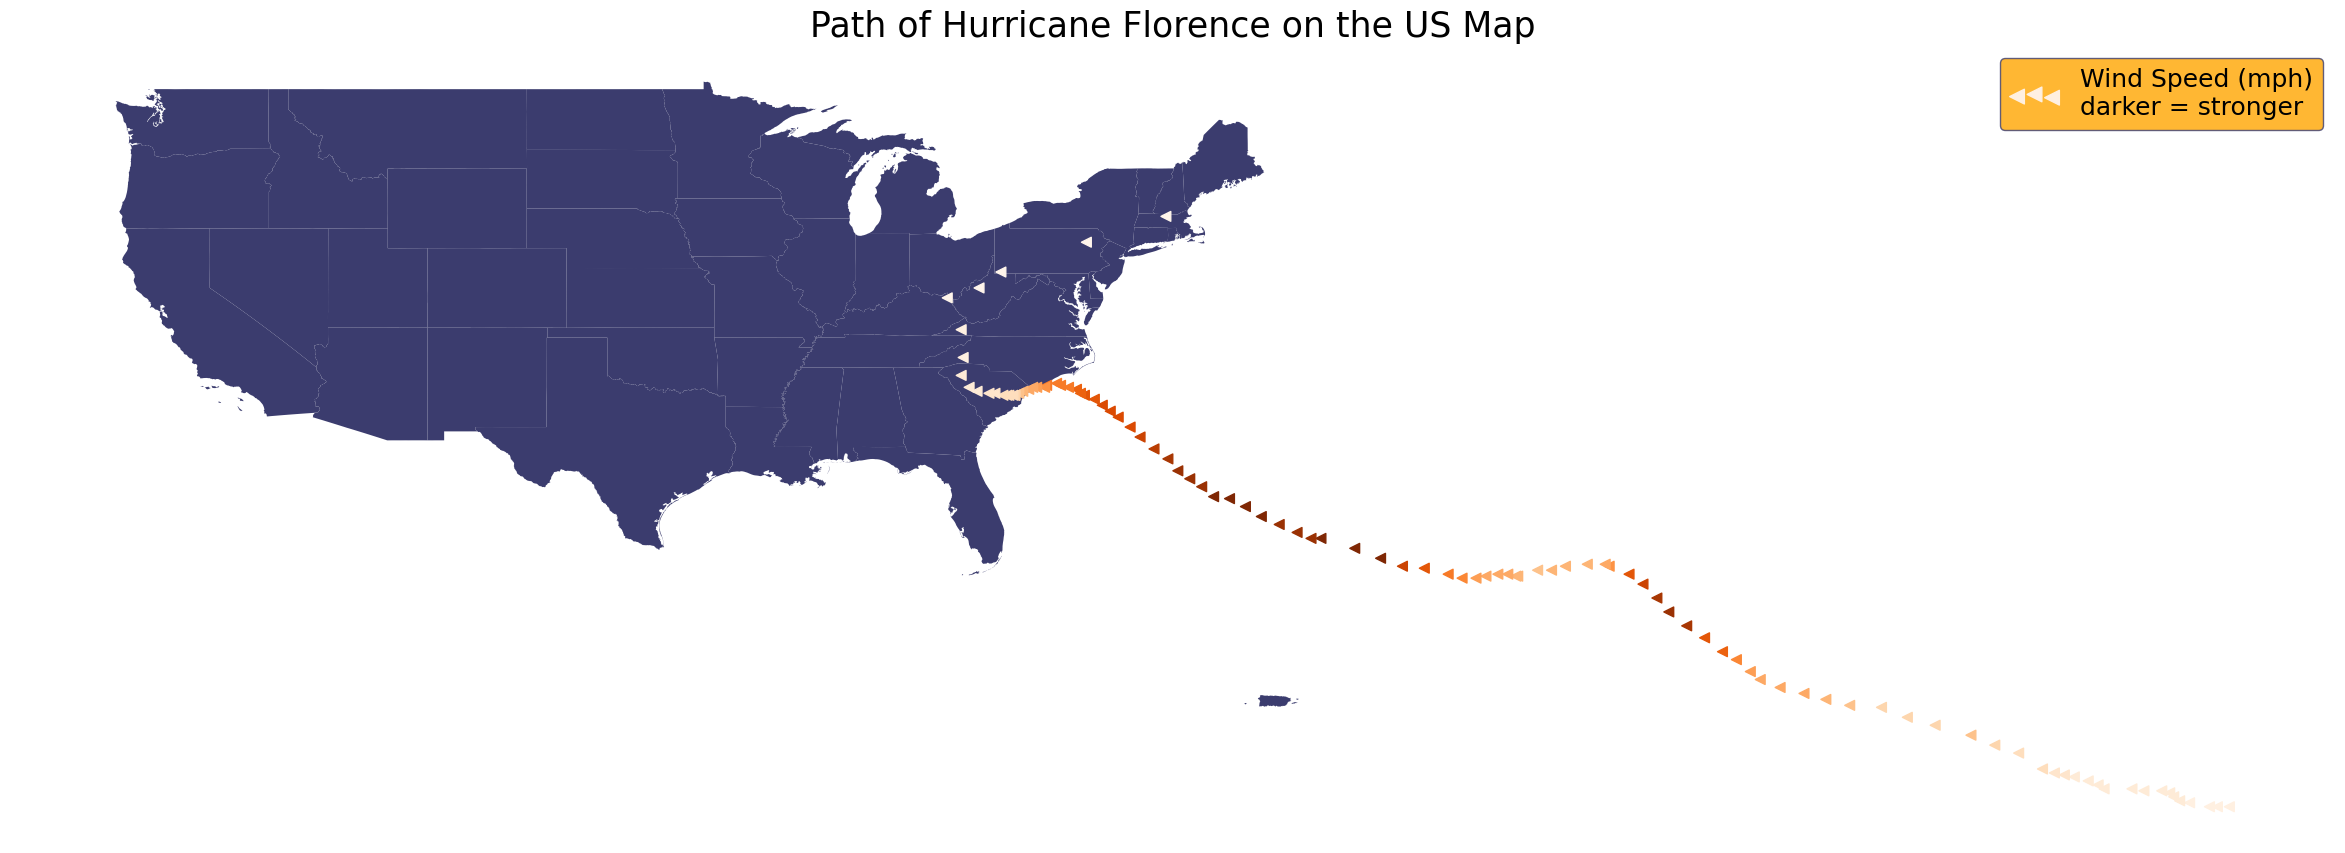

In [24]:
from matplotlib.cm import ScalarMappable

# Plotting the US map
fig, ax = plt.subplots(1, figsize=(30, 20))
map = country[country['NAME'].isin(['Alaska', 'Hawaii'])== False].plot(ax=ax, color='#3B3C6E')

# Overlaying the hurricane position on the US map
florence.plot(ax=map,
              column='Wind',
              marker='<',
              markersize=50,
              cmap='Oranges',
              label='Wind speed(mph)') #labels not showing

turn_off_axis = ax.axis('off')

ax.set_title('Path of Hurricane Florence on the US Map', fontsize=25)

plt.legend(labels=["Wind Speed (mph)\ndarker = stronger"],
           fontsize=18,
           facecolor='orange',
           markerscale=1.5,
           loc='best',
           scatterpoints=3,
           fancybox=True,
           edgecolor='#3B3C6E')

plt.show()